In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

# Define learning parameters

In [2]:
# learning parameters
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare training dataset

In [3]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# Generator

In [4]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [5]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [6]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [7]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [8]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [9]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [10]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)


In [11]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [12]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [13]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q. Write training loop

118it [00:27,  4.32it/s]                                                        


Epoch 1 of 100
Generator loss: 5.49109296, Discriminator loss: 0.15387046


118it [00:26,  4.41it/s]                                                        


Epoch 2 of 100
Generator loss: 1.93801974, Discriminator loss: 0.60766851


118it [00:26,  4.47it/s]                                                        


Epoch 3 of 100
Generator loss: 2.01031945, Discriminator loss: 0.52283471


118it [00:26,  4.48it/s]                                                        


Epoch 4 of 100
Generator loss: 1.20173227, Discriminator loss: 0.58013994


118it [00:26,  4.54it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


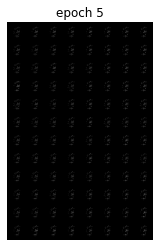

Epoch 5 of 100
Generator loss: 1.90067369, Discriminator loss: 0.55797506


118it [00:27,  4.22it/s]                                                        


Epoch 6 of 100
Generator loss: 2.78045536, Discriminator loss: 0.42665904


118it [00:29,  4.05it/s]                                                        


Epoch 7 of 100
Generator loss: 1.80612210, Discriminator loss: 0.69568779


118it [00:28,  4.18it/s]                                                        


Epoch 8 of 100
Generator loss: 1.17820842, Discriminator loss: 0.69472315


118it [00:28,  4.15it/s]                                                        


Epoch 9 of 100
Generator loss: 1.42286417, Discriminator loss: 0.54475888


118it [00:28,  4.15it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


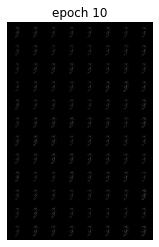

Epoch 10 of 100
Generator loss: 1.22720002, Discriminator loss: 0.56363437


118it [00:26,  4.46it/s]                                                        


Epoch 11 of 100
Generator loss: 3.38857282, Discriminator loss: 0.71731785


118it [00:27,  4.23it/s]                                                        


Epoch 12 of 100
Generator loss: 1.97156316, Discriminator loss: 0.50713301


118it [00:26,  4.41it/s]                                                        


Epoch 13 of 100
Generator loss: 1.77989841, Discriminator loss: 0.55863401


118it [00:26,  4.42it/s]                                                        


Epoch 14 of 100
Generator loss: 2.35561158, Discriminator loss: 0.46818637


118it [00:27,  4.30it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


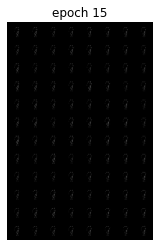

Epoch 15 of 100
Generator loss: 1.89105961, Discriminator loss: 0.31780409


118it [00:26,  4.39it/s]                                                        


Epoch 16 of 100
Generator loss: 2.42330766, Discriminator loss: 0.26245491


118it [00:25,  4.55it/s]                                                        


Epoch 17 of 100
Generator loss: 3.13162367, Discriminator loss: 0.41270216


118it [00:25,  4.57it/s]                                                        


Epoch 18 of 100
Generator loss: 1.83829674, Discriminator loss: 0.41790249


118it [00:25,  4.57it/s]                                                        


Epoch 19 of 100
Generator loss: 2.91195192, Discriminator loss: 0.22426370


118it [00:25,  4.59it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


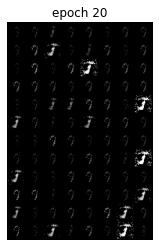

Epoch 20 of 100
Generator loss: 4.02116952, Discriminator loss: 0.22146377


118it [00:26,  4.47it/s]                                                        


Epoch 21 of 100
Generator loss: 3.30183283, Discriminator loss: 0.28681911


118it [00:27,  4.36it/s]                                                        


Epoch 22 of 100
Generator loss: 3.10651943, Discriminator loss: 0.21650247


118it [00:25,  4.59it/s]                                                        


Epoch 23 of 100
Generator loss: 2.88898867, Discriminator loss: 0.33147069


118it [00:25,  4.58it/s]                                                        


Epoch 24 of 100
Generator loss: 2.67080701, Discriminator loss: 0.29823613


118it [00:25,  4.54it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


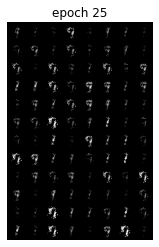

Epoch 25 of 100
Generator loss: 3.08860889, Discriminator loss: 0.30471559


118it [00:26,  4.54it/s]                                                        


Epoch 26 of 100
Generator loss: 2.52729353, Discriminator loss: 0.32138630


118it [00:26,  4.52it/s]                                                        


Epoch 27 of 100
Generator loss: 2.78810647, Discriminator loss: 0.26585613


118it [00:26,  4.52it/s]                                                        


Epoch 28 of 100
Generator loss: 2.87597142, Discriminator loss: 0.25547927


118it [00:26,  4.52it/s]                                                        


Epoch 29 of 100
Generator loss: 2.80370532, Discriminator loss: 0.24092028


118it [00:27,  4.23it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


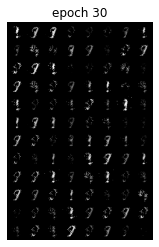

Epoch 30 of 100
Generator loss: 3.11788301, Discriminator loss: 0.22644961


118it [00:38,  3.06it/s]                                                        


Epoch 31 of 100
Generator loss: 3.39024447, Discriminator loss: 0.22462041


118it [00:32,  3.62it/s]                                                        


Epoch 32 of 100
Generator loss: 2.96321739, Discriminator loss: 0.27516029


118it [00:28,  4.11it/s]                                                        


Epoch 33 of 100
Generator loss: 3.06257319, Discriminator loss: 0.24307321


118it [00:30,  3.90it/s]                                                        


Epoch 34 of 100
Generator loss: 3.22380115, Discriminator loss: 0.22318671


118it [00:34,  3.46it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


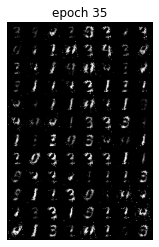

Epoch 35 of 100
Generator loss: 3.57112237, Discriminator loss: 0.20106988


118it [00:26,  4.51it/s]                                                        


Epoch 36 of 100
Generator loss: 3.70650552, Discriminator loss: 0.23141812


118it [00:26,  4.49it/s]                                                        


Epoch 37 of 100
Generator loss: 3.25229240, Discriminator loss: 0.25661314


118it [00:26,  4.48it/s]                                                        


Epoch 38 of 100
Generator loss: 3.32783086, Discriminator loss: 0.21502511


118it [00:26,  4.46it/s]                                                        


Epoch 39 of 100
Generator loss: 3.54316254, Discriminator loss: 0.18085544


118it [00:26,  4.45it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


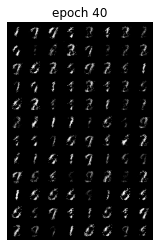

Epoch 40 of 100
Generator loss: 3.17921791, Discriminator loss: 0.23299241


118it [00:26,  4.44it/s]                                                        


Epoch 41 of 100
Generator loss: 3.31245651, Discriminator loss: 0.22562967


118it [00:27,  4.33it/s]                                                        


Epoch 42 of 100
Generator loss: 3.27436782, Discriminator loss: 0.23790242


118it [00:26,  4.38it/s]                                                        


Epoch 43 of 100
Generator loss: 3.13507167, Discriminator loss: 0.23859413


118it [00:27,  4.33it/s]                                                        


Epoch 44 of 100
Generator loss: 3.03327479, Discriminator loss: 0.22352454


118it [00:26,  4.40it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


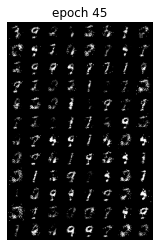

Epoch 45 of 100
Generator loss: 2.91418322, Discriminator loss: 0.24177994


118it [00:26,  4.40it/s]                                                        


Epoch 46 of 100
Generator loss: 2.85381636, Discriminator loss: 0.27744792


118it [00:26,  4.39it/s]                                                        


Epoch 47 of 100
Generator loss: 3.19324173, Discriminator loss: 0.22076224


118it [00:28,  4.18it/s]                                                        


Epoch 48 of 100
Generator loss: 3.36618472, Discriminator loss: 0.21580381


118it [00:26,  4.48it/s]                                                        


Epoch 49 of 100
Generator loss: 3.12556528, Discriminator loss: 0.27627481


118it [00:26,  4.49it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


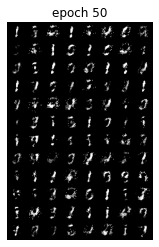

Epoch 50 of 100
Generator loss: 2.93956716, Discriminator loss: 0.26367076


118it [00:25,  4.54it/s]                                                        


Epoch 51 of 100
Generator loss: 3.07584313, Discriminator loss: 0.25324988


118it [00:26,  4.53it/s]                                                        


Epoch 52 of 100
Generator loss: 3.12964261, Discriminator loss: 0.24773288


118it [00:26,  4.50it/s]                                                        


Epoch 53 of 100
Generator loss: 3.19912799, Discriminator loss: 0.23765113


118it [00:26,  4.52it/s]                                                        


Epoch 54 of 100
Generator loss: 2.80706516, Discriminator loss: 0.28837677


118it [00:26,  4.48it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


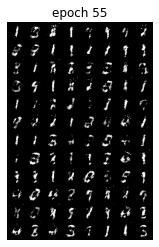

Epoch 55 of 100
Generator loss: 2.95434893, Discriminator loss: 0.25229839


118it [00:26,  4.54it/s]                                                        


Epoch 56 of 100
Generator loss: 2.76876819, Discriminator loss: 0.27747848


118it [00:25,  4.55it/s]                                                        


Epoch 57 of 100
Generator loss: 2.82584304, Discriminator loss: 0.27620314


118it [00:26,  4.54it/s]                                                        


Epoch 58 of 100
Generator loss: 2.74405336, Discriminator loss: 0.28601101


118it [00:25,  4.56it/s]                                                        


Epoch 59 of 100
Generator loss: 2.64634698, Discriminator loss: 0.27381941


118it [00:26,  4.51it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


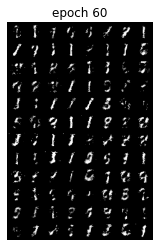

Epoch 60 of 100
Generator loss: 2.72462990, Discriminator loss: 0.27080412


118it [00:26,  4.49it/s]                                                        


Epoch 61 of 100
Generator loss: 2.73176307, Discriminator loss: 0.28667917


118it [00:26,  4.47it/s]                                                        


Epoch 62 of 100
Generator loss: 2.72867634, Discriminator loss: 0.28311623


118it [00:27,  4.37it/s]                                                        


Epoch 63 of 100
Generator loss: 2.84295344, Discriminator loss: 0.28065772


118it [00:26,  4.51it/s]                                                        


Epoch 64 of 100
Generator loss: 2.62508626, Discriminator loss: 0.30519497


118it [00:26,  4.49it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


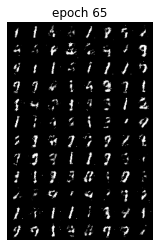

Epoch 65 of 100
Generator loss: 2.46694317, Discriminator loss: 0.31939755


118it [00:28,  4.11it/s]                                                        


Epoch 66 of 100
Generator loss: 2.61942093, Discriminator loss: 0.29414921


118it [00:26,  4.45it/s]                                                        


Epoch 67 of 100
Generator loss: 2.69125821, Discriminator loss: 0.27917719


118it [00:26,  4.46it/s]                                                        


Epoch 68 of 100
Generator loss: 2.56465461, Discriminator loss: 0.30021058


118it [00:26,  4.50it/s]                                                        


Epoch 69 of 100
Generator loss: 2.51752363, Discriminator loss: 0.30484589


118it [00:26,  4.47it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


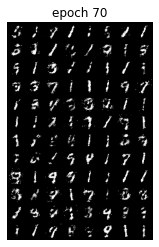

Epoch 70 of 100
Generator loss: 2.38288387, Discriminator loss: 0.31337416


118it [00:26,  4.45it/s]                                                        


Epoch 71 of 100
Generator loss: 2.51368259, Discriminator loss: 0.29727865


118it [00:26,  4.44it/s]                                                        


Epoch 72 of 100
Generator loss: 2.48130637, Discriminator loss: 0.29659111


118it [00:26,  4.48it/s]                                                        


Epoch 73 of 100
Generator loss: 2.55541103, Discriminator loss: 0.29650473


118it [00:26,  4.43it/s]                                                        


Epoch 74 of 100
Generator loss: 2.50579802, Discriminator loss: 0.31771450


118it [00:26,  4.46it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


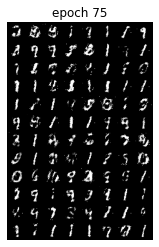

Epoch 75 of 100
Generator loss: 2.37107306, Discriminator loss: 0.32757489


118it [00:26,  4.46it/s]                                                        


Epoch 76 of 100
Generator loss: 2.45171107, Discriminator loss: 0.30947828


118it [00:26,  4.41it/s]                                                        


Epoch 77 of 100
Generator loss: 2.37601977, Discriminator loss: 0.31842408


118it [00:26,  4.46it/s]                                                        


Epoch 78 of 100
Generator loss: 2.41093291, Discriminator loss: 0.31057472


118it [00:26,  4.50it/s]                                                        


Epoch 79 of 100
Generator loss: 2.56335074, Discriminator loss: 0.30617988


118it [00:26,  4.43it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


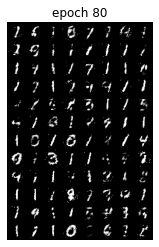

Epoch 80 of 100
Generator loss: 2.43289055, Discriminator loss: 0.33827425


118it [00:26,  4.50it/s]                                                        


Epoch 81 of 100
Generator loss: 2.20981788, Discriminator loss: 0.34703539


118it [00:26,  4.47it/s]                                                        


Epoch 82 of 100
Generator loss: 2.18281089, Discriminator loss: 0.34498227


118it [00:26,  4.46it/s]                                                        


Epoch 83 of 100
Generator loss: 2.22582956, Discriminator loss: 0.34074234


118it [00:26,  4.51it/s]                                                        


Epoch 84 of 100
Generator loss: 2.41455924, Discriminator loss: 0.33630233


118it [00:26,  4.50it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


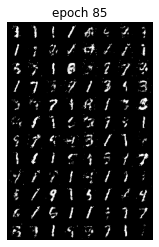

Epoch 85 of 100
Generator loss: 2.07802987, Discriminator loss: 0.34849723


118it [00:26,  4.47it/s]                                                        


Epoch 86 of 100
Generator loss: 2.23723095, Discriminator loss: 0.35231472


118it [00:26,  4.48it/s]                                                        


Epoch 87 of 100
Generator loss: 2.09402331, Discriminator loss: 0.37543684


118it [00:26,  4.52it/s]                                                        


Epoch 88 of 100
Generator loss: 2.05222504, Discriminator loss: 0.38053687


118it [00:27,  4.28it/s]                                                        


Epoch 89 of 100
Generator loss: 2.09610377, Discriminator loss: 0.38095106


118it [00:26,  4.50it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


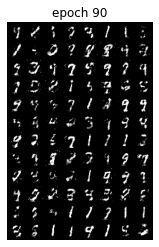

Epoch 90 of 100
Generator loss: 2.09402254, Discriminator loss: 0.37675761


118it [00:26,  4.38it/s]                                                        


Epoch 91 of 100
Generator loss: 2.07599383, Discriminator loss: 0.38170323


118it [00:26,  4.43it/s]                                                        


Epoch 92 of 100
Generator loss: 2.03839307, Discriminator loss: 0.38646808


118it [00:27,  4.32it/s]                                                        


Epoch 93 of 100
Generator loss: 1.94190222, Discriminator loss: 0.39002961


118it [00:26,  4.37it/s]                                                        


Epoch 94 of 100
Generator loss: 2.04644146, Discriminator loss: 0.37616851


118it [00:26,  4.39it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


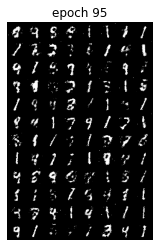

Epoch 95 of 100
Generator loss: 2.10829785, Discriminator loss: 0.38959055


118it [00:25,  4.54it/s]                                                        


Epoch 96 of 100
Generator loss: 2.03142672, Discriminator loss: 0.37402359


118it [00:26,  4.54it/s]                                                        


Epoch 97 of 100
Generator loss: 2.08806411, Discriminator loss: 0.38045089


118it [00:26,  4.42it/s]                                                        


Epoch 98 of 100
Generator loss: 2.01902527, Discriminator loss: 0.38469837


118it [00:26,  4.44it/s]                                                        


Epoch 99 of 100
Generator loss: 1.99979675, Discriminator loss: 0.39169676


118it [00:26,  4.49it/s]                                                        
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


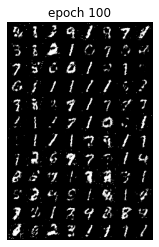

Epoch 100 of 100
Generator loss: 1.92868705, Discriminator loss: 0.39971003


In [17]:
torch.manual_seed(7777)

def generator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    return criterion(output,true_label)
    
    
    ######################################
    
def discriminator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    return criterion(output,true_label)
    
    
    ######################################
    

for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ########## 
        real_images,_=data
        batch_size = real_images.size(0)
        real_images = real_images.to(device)
        noise = create_noise(batch_size, nz)
        fake_images = generator(noise)
        real_output = discriminator(real_images)
        fake_output = discriminator(fake_images.detach())
        real_labels = label_real(batch_size).to(device)
        fake_labels = label_fake(batch_size).to(device)
        all_outputs = torch.cat((real_output, fake_output), dim=0)
        all_labels = torch.cat((real_labels, fake_labels), dim=0)
        d_loss = discriminator_loss(all_outputs, all_labels)
        optim_d.zero_grad()
        d_loss.backward()
        optim_d.step()

        noise = create_noise(batch_size, nz)
        fake_images = generator(noise)
        output = discriminator(fake_images)
        g_loss = generator_loss(output, real_labels)
        optim_g.zero_grad()
        g_loss.backward()
        optim_g.step()
        

        loss_g+= g_loss.item()
        loss_d+= d_loss.item()
                            
        ######################################
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [18]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator.pth')

DONE TRAINING


In [19]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_images.gif', imgs)

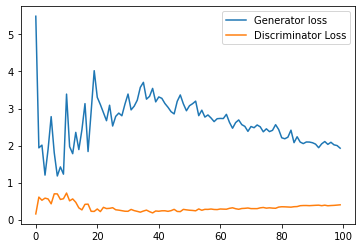

In [20]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/loss.png')